###PUNTO 1###
**¿Qué modelo seleccionaría?**

El modelo que seleccionariamos es el modelo 3, con 0.6 en training error y 0.8 en testing error.

**¿Qué modelo parece tener underfitting?**

El modelo que parece tener mayor underfitting es el modelo 4, con 1.9 en training error y 2.3 en testing error.

**¿Qué modelo parece tener overfitting?**

El modelo que parece tener mayor overfitting es el modelo 1, con 0.1 en training error y 1.8 en testing error.



###PUNTO 2###
LINK CUADRO EXCEL:
https://drive.google.com/file/d/1nrvPOUKjlrGscwvGqHBf8yxUICBmhbrj/view?usp=sharing

###PUNTO 3###


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

Cargue los datos en un DataFrame


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/position.csv')
data

,times,accel
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7
...,...,...
128,53.2,-14.7
129,55.0,-2.7
130,55.0,10.7
131,55.4,-2.7


Visualiza el histograma de cada característica

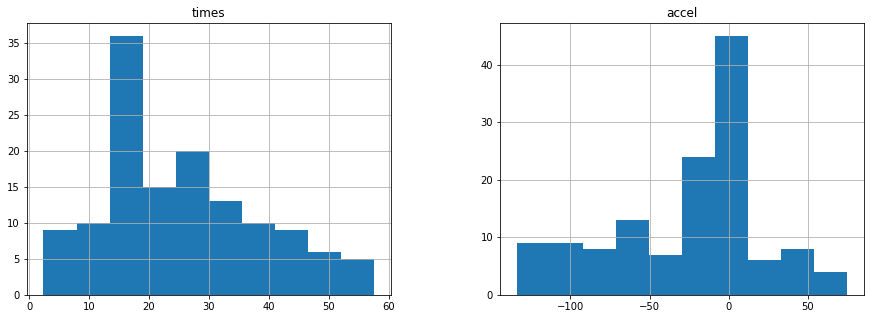

In [ ]:
data.hist(figsize=(15,5))
plt.show()

Genere un diagrama de dispersión utilizando tiempo en el eje x y la aceleración en el eje y.



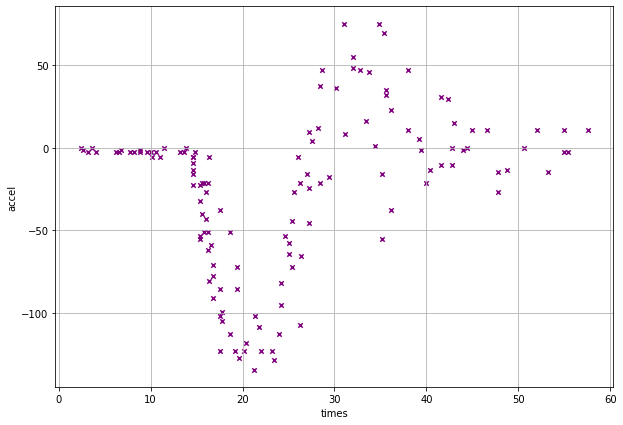

In [ ]:
data.plot(kind='scatter', x='times', y='accel', figsize=(10,7), grid=True, marker='x', color= 'purple')
plt.show()

De manera incremental genere modelos que intenten ajustar polinomios de grado 1, 2, 3, etc. hasta que los datos presenten un buen nivel de ajuste. Recuerde utilizar la clase PolynomialFeatures para generar nuevas características. El objetivo es encontrar el polinomio de menor grado que ajuste correctamente los datos.


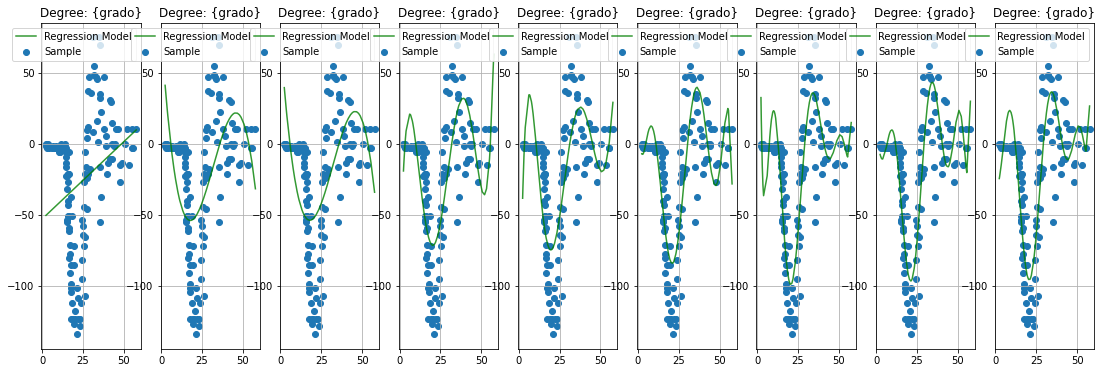

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

plt.figure(figsize=(21, 6))

pr = LinearRegression()
grados = [1, 3, 4, 5, 6, 7, 8, 9, 10]
y_pred = []
i = 1
x = data['times'].values
x = x.reshape(-1,1)
y = data['accel'].values

for grado in grados:

  polinomio = PolynomialFeatures(degree=grado, include_bias=False)
  X_pol = polinomio.fit_transform(x)
  pr.fit(X_pol, y)
  y_pred = pr.predict(X_pol)
  plt.subplot(1, 10, i)
  plt.scatter(x, y, label='Sample')
  plt.plot(x, y_pred, color='green', alpha= 0.8, label='Regression Model')
  plt.legend()
  plt.grid()
  i +=1
  plt.title('Degree: {grado}')

Visualice cada uno de los modelos generados contra los datos. Utilice el método subplots de
matplotlib para generar una sola figura que contenga las gráficas de todos los modelos.

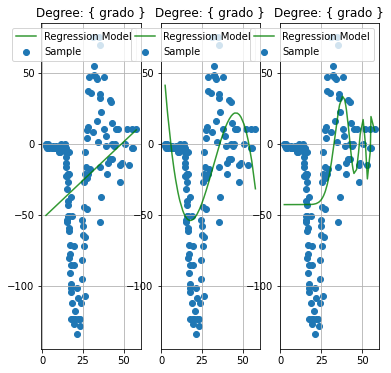

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

plt.figure(figsize=(21, 6))

pr = LinearRegression()
grados = [1, 3, 21]
y_pred = []
i = 1
x = data['times'].values
x = x.reshape(-1,1)
y = data['accel'].values
for grado in grados:

  polinomio = PolynomialFeatures(degree=grado, include_bias=False)
  X_pol = polinomio.fit_transform(x)
  pr.fit(X_pol, y)
  y_pred = pr.predict(X_pol)
  plt.subplot(1, 10, i)
  plt.scatter(x, y, label='Sample')
  plt.plot(x, y_pred, color='green', alpha= 0.8, label='Regression Model')
  plt.legend()
  plt.grid()
  i +=1
  plt.title('Degree: { grado }')

Utilice alguna métrica de regresión para verificar la bondad del ajuste de todos los modelos generados y compárelos a través de un diagrama de barras.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

mae_poli= mean_absolute_error(y, y_pred)
print('MAE: ', mae_poli )

MAE:  34.84872686507067


In [ ]:
from sklearn.metrics import r2_score
r2_poli = r2_score(y, y_pred)
print(r2_poli)

0.2562123023083428


###PUNTO 4###

Utilizando los datos disponibles en [1] encuentre un modelo que se ajuste a los datos utilizando la regresión de Lasso y la regresión de Ridge.



# **LASSO**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.222e+04, tolerance: 3.082e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


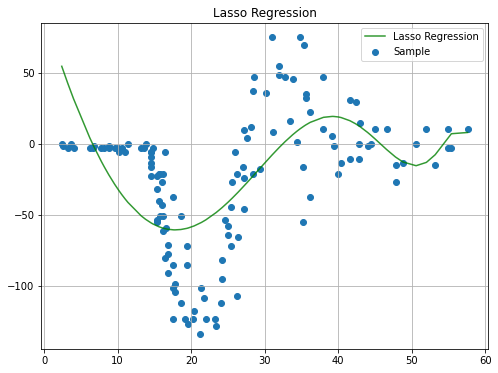

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001, max_iter= 1500)

plt.figure(figsize=(8, 6))

lasso.fit(X_pol, y)

lasso_pred = lasso.predict(X_pol)
plt.scatter(x, y, label='Sample')
plt.plot(x, lasso_pred, color='green', alpha= 0.8, label='Lasso Regression')
plt.legend()
plt.grid()
plt.title('Lasso Regression')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
mae_lasso= mean_absolute_error(x, lasso_pred)
print('MAE: ', mae_lasso )

MAE:  53.77352867732821


In [ ]:
from sklearn.metrics import r2_score
r2_lasso = r2_score(y, lasso_pred)
print(r2_lasso)

0.4016176921558976


# **Ridge**


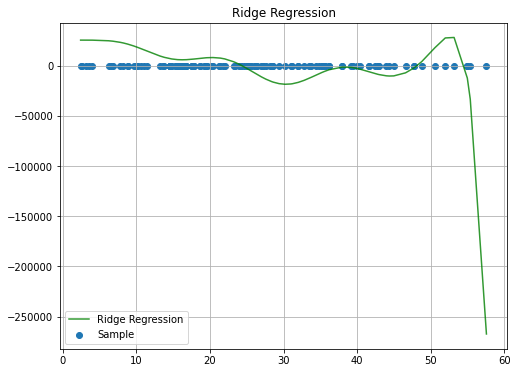

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)

polinomio = PolynomialFeatures(degree=21, include_bias=False)
X_pol = polinomio.fit_transform(x)

plt.figure(figsize=(8, 6))
ridge.fit(X_pol, y)
ridge_pred = ridge.predict(X_pol)
plt.scatter(x, y, label='Sample')
plt.plot(x, ridge_pred, color='green', alpha= 0.8, label='Ridge Regression')
plt.legend()
plt.grid()
plt.title('Ridge Regression')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
mae_ridge= mean_absolute_error(x, ridge_pred)
print('MAE: ', mae_ridge )

MAE:  12060.474777915464


In [ ]:
from sklearn.metrics import r2_score
r2_ridge = r2_score(x, ridge_pred)
print(r2_ridge)

-4020884.8123791874


###PUNTO 5###

Construya una gráfica que permita comparar los datos con el mejor modelo obtenido en el tercer punto y los modelos obtenidos por Lasso y Ridge.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


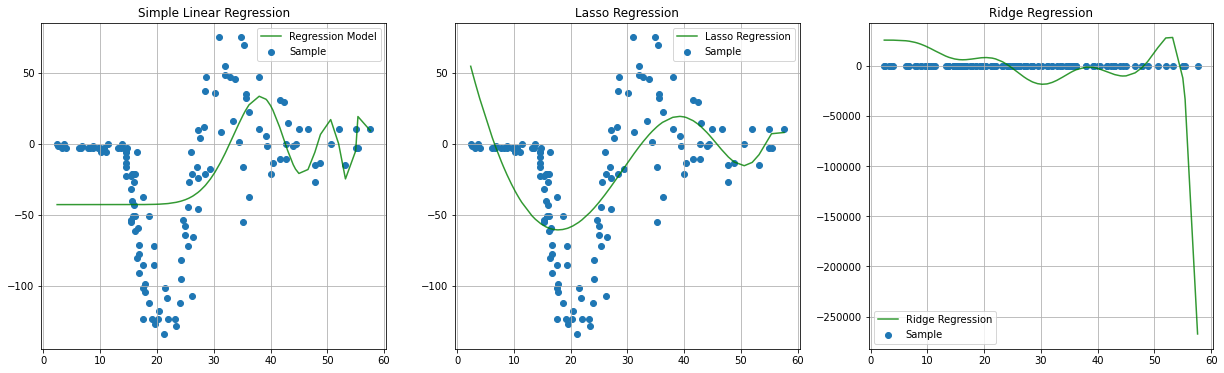

In [ ]:
plt.figure(figsize=(21, 6))

pr = LinearRegression()
pr.fit(X_pol, y)
y_pred = pr.predict(X_pol)
plt.subplot(1, 3, 1)
plt.scatter(x, y, label='Sample')
plt.subplot(1, 3, 1)
plt.plot(x, y_pred, color='green', alpha= 0.8, label='Regression Model')
plt.legend()
plt.grid()
plt.title('Simple Linear Regression')


plt.subplot(1, 3, 2)
plt.scatter(x, y, label='Sample')
plt.plot(x, lasso_pred, color='green', alpha= 0.8, label='Lasso Regression')
plt.legend()
plt.grid()
plt.title('Lasso Regression')

plt.subplot(1, 3, 3)
plt.scatter(x, y, label='Sample')
plt.plot(x, ridge_pred, color='green', alpha= 0.8, label='Ridge Regression')
plt.legend()
plt.grid()
plt.title('Ridge Regression')
plt.show()

Utilice alguna métrica de regresión para verificar la bondad del ajuste de todos los modelos generados y compárelos a través de un diagrama de barras.

<Figure size 1440x720 with 0 Axes>

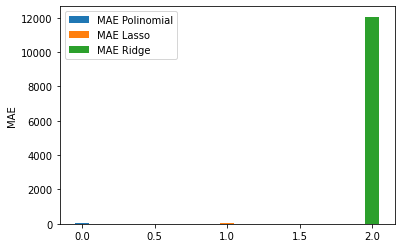

In [ ]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
ax.bar(0, mae_poli, width=0.1, label="MAE Polinomial")
ax.bar(1, mae_lasso, width=0.1, label="MAE Lasso")
ax.bar(2, mae_ridge, width=0.1, label="MAE Ridge")
ax.set_ylabel('MAE')
ax.legend()


<Figure size 1440x720 with 0 Axes>

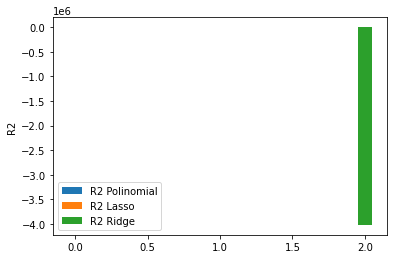

In [ ]:
plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
ax.bar(0, r2_poli, width=0.1, label="R2 Polinomial")
ax.bar(1, r2_lasso, width=0.1, label="R2 Lasso")
ax.bar(2, r2_ridge, width=0.1, label="R2 Ridge")
ax.set_ylabel('R2')
ax.legend()
